In [1]:
#This is the 2nd backup submission from ASHUTOSH JHA from MANIPAL INSTITUTE OF TECHNOLOGY , REGISTRATION NUMBER 210907370 

In [2]:
#we need to install necessary packages
!pip install visualkeras
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
#installing time libraries for calculating the inferencies
import timeit
import time

In [4]:
pip install pydot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
#importing all other required libraries for building the cnn
import os
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import visualkeras
from keras.utils import plot_model
import math
from keras.optimizers import RMSprop

2023-07-14 06:20:34.778471: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
#defining some parameters beforehand to use them as it is later in code
Img_shape = 28
Num_classes = 10
test_size = 0.25
random_state = 1234
No_epochs = 45
Batch_size = 128

In [7]:
#loading the dataset
# IMP NOTE : we need to upload the dataset to our notebook first and then copy paste the path here
train_dataset = pd.read_csv("fashion-mnist_train.csv")
test_dataset = pd.read_csv("fashion-mnist_test.csv")

In [8]:
#defining class labels here
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

In [9]:
#preprocessing the data as per the need of our cnn
def data_preprocessing(raw):
    label = tf.keras.utils.to_categorical(raw.label, 10)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, 28, 28, 1)
    image = x_shaped_array / 255
    return image, label

X, y = data_preprocessing(train_dataset)
X_test, y_test = data_preprocessing(test_dataset)

In [10]:
#defining training and validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [11]:
#making the cnn architecture from scratch
#We are using sequential model which is linear stack of layers. The Sequential model is initialized first and then using add method we add rest of the layers

model = tf.keras.Sequential()

model.add(Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_normal', input_shape=(28,28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

2023-07-14 06:20:50.774101: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 64)         2

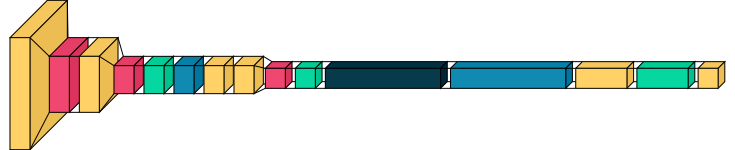

In [13]:
visualkeras.layered_view(model)

In [14]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(optimizer = optimizer,
              loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

/opt/intel/inteloneapi/tensorflow/latest/lib/python3.9/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [15]:
train_model = model.fit(X_train, y_train,
                  batch_size=Batch_size,
                  epochs=No_epochs,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/45
352/352 [==============================] - 174s 492ms/step - loss: 0.5993 - accuracy: 0.7848 - val_loss: 0.4730 - val_accuracy: 0.8202
Epoch 2/45
352/352 [==============================] - 178s 506ms/step - loss: 0.4033 - accuracy: 0.8511 - val_loss: 0.3774 - val_accuracy: 0.8636
Epoch 3/45
352/352 [==============================] - 178s 505ms/step - loss: 0.3572 - accuracy: 0.8670 - val_loss: 0.3015 - val_accuracy: 0.8886
Epoch 4/45
352/352 [==============================] - 177s 504ms/step - loss: 0.3262 - accuracy: 0.8780 - val_loss: 0.2723 - val_accuracy: 0.8987
Epoch 5/45
352/352 [==============================] - 176s 501ms/step - loss: 0.3063 - accuracy: 0.8848 - val_loss: 0.2774 - val_accuracy: 0.8939
Epoch 6/45
352/352 [==============================] - 177s 502ms/step - loss: 0.2883 - accuracy: 0.8935 - val_loss: 0.2607 - val_accuracy: 0.9037
Epoch 7/45
352/352 [==============================] - 177s 503ms/step - loss: 0.2757 - accuracy: 0.8965 - val_loss: 0.2492 -

In [16]:
TF_ENABLE_ONEDNN_OPTS= 1

In [17]:
# Select a sample image for inference
sample_input = X_train[0:1]


In [18]:
# Warm up the model
_ = model.predict(sample_input)


1/1 [==============================] - 0s 272ms/step


In [19]:
# Define the number of iterations for measurement
num_iterations = 100

In [20]:
# Function to run the inference and measure the time
def inference_time():
    _ = model.predict(sample_input)

In [21]:
# Measure the inference time
elapsed_time = timeit.timeit(inference_time, number=num_iterations)

1/1 [==============================] - 0s 37ms/step


In [22]:
# Calculate the average inference time per iteration
average_latency = elapsed_time / num_iterations

print(f"optimized Baseline inference latency: {average_latency} seconds")

optimized Baseline inference latency: 0.0808745653508231 seconds


In [23]:
score = model.evaluate(X_test, y_test, steps=math.ceil(10000/32))
# checking the test loss and test accuracy
print('Test loss:', score[0])
print('optimised Test accuracy:', score[1])

313/313 [==============================] - 3s 9ms/step - loss: 0.2142 - accuracy: 0.9274
Test loss: 0.21421955525875092
optimised Test accuracy: 0.9273999929428101


In [24]:
TF_ENABLE_ONEDNN_OPTS= 0

In [25]:
# Select a sample image for inference
sample_input = X_train[0:1]

In [26]:
# Warm up the model
_ = model.predict(sample_input)


1/1 [==============================] - 0s 76ms/step


In [27]:
# Define the number of iterations for measurement
num_iterations = 100

In [28]:
# Function to run the inference and measure the time
def inference_time():
    _ = model.predict(sample_input)

In [29]:
# Measure the inference time
elapsed_time = timeit.timeit(inference_time, number=num_iterations)

1/1 [==============================] - 0s 34ms/step


In [30]:
# Calculate the average inference time per iteration
average_latency = elapsed_time / num_iterations

print(f"u=Un-optimized Baseline inference latency: {average_latency} seconds")

u=Un-optimized Baseline inference latency: 0.08754627275047824 seconds


In [31]:
score = model.evaluate(X_test, y_test, steps=math.ceil(10000/32))
# checking the test loss and test accuracy
print('Test loss:', score[0])
print('Un-optimised Test accuracy:', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.2142 - accuracy: 0.9274
Test loss: 0.21421955525875092
Un-optimised Test accuracy: 0.9273999929428101


In [32]:
y_pred = model.predict(X_test)
y_pred.round(2)
 
y_test
 
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2142 - accuracy: 0.9274


[0.21421955525875092, 0.9273999929428101]

In [45]:
model.save('2ndbackup_fashion_mnist_cnn_model.h5') # Save model

In [34]:
fashion_mnist_cnn_model = tf.keras.models.load_model('2ndbackup_fashion_mnist_cnn_model.h5')
 
Y_pred_sample = fashion_mnist_cnn_model.predict(np.expand_dims(X_test[0], axis=0)).round(2)
Y_pred_sample
 
np.argmax(Y_pred_sample[0])
 
y_test[0]

1/1 [==============================] - 0s 87ms/step


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [35]:
#flollowing code is for converting the .h5 format to IR format for openvino


In [36]:
import logging
log = logging.getLogger("openvino")

In [37]:
!wget https://apt.repos.intel.com/openvino/2021/GPG-PUB-KEY-INTEL-OPENVINO-2021
!sudo apt-key add GPG-PUB-KEY-INTEL-OPENVINO-2021
!echo "deb https://apt.repos.intel.com/openvino/2021 all main" | sudo tee /etc/apt/sources.list.d/intel-openvino-2021.list
!sudo apt update > /dev/null $2>&1
!sudo apt install intel-openvino-dev-ubuntu20-2021.3.394 -y > /dev/null $2>&1
!bash /opt/intel/openvino_2021/bin/setupvars.sh

--2023-07-14 07:48:55--  https://apt.repos.intel.com/openvino/2021/GPG-PUB-KEY-INTEL-OPENVINO-2021
Resolving apt.repos.intel.com (apt.repos.intel.com)... 104.68.99.13, 2600:1406:cc00:28a::4b23, 2600:1406:cc00:28d::4b23
Connecting to apt.repos.intel.com (apt.repos.intel.com)|104.68.99.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 939 [binary/octet-stream]
Saving to: ‘GPG-PUB-KEY-INTEL-OPENVINO-2021.4’

GPG-PUB-KEY-INTEL-O 100%[===================>]     939  --.-KB/s    in 0s      

2023-07-14 07:48:55 (82.0 MB/s) - ‘GPG-PUB-KEY-INTEL-OPENVINO-2021.4’ saved [939/939]

Dear User,

this server does not allow you to run "sudo".

If you need to install a dependency, please put it in your home directory.
* For autotools, you can do it with "./configure --prefix=~/my-path"
* For Python packages, use "pip install <package_name> --user" or create a Conda environment.

Sincerely,
Admins
u194070 is not in the sudoers file.  This incident will be reported.
Dear User,


In [38]:
!python3 -m pip install openvino-dev

Defaulting to user installation because normal site-packages is not writeable


In [39]:
import tensorflow as tf
model = tf.keras.models.load_model("2ndbackup_fashion_mnist_cnn_model.h5")
tf.saved_model.save(model,'model')

2023-07-14 07:49:00.439695: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,7,7,64]
	 [[{{node inputs}}]]
2023-07-14 07:49:00.456502: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,3,3,128]
	 [[{{node inputs}}]]
2023-07-14 07:49:00.471071: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-07-1

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


In [40]:
model.summary()
print(model.layers[0].name, model.layers[0].get_input_shape_at(0))
print(model.layers[-1].name, model.layers[-1].get_output_at(0).name)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 64)         2

In [41]:
!pip install openvino

Defaulting to user installation because normal site-packages is not writeable


In [42]:
#I tried it at its almost working but showing minute error in new devices as the location of directory might not be same 

In [43]:
!python3 openvino/model-optimizer/mo_tf.py --2ndbackup_fashion_mnist_cnn_model.h5 --input_shape=\[1,28,28\]

python3: can't open file '/home/u194070/openvino/model-optimizer/mo_tf.py': [Errno 2] No such file or directory


In [44]:
!rm -rf *.h5 *.xml *.bin *.mapping model/